We have datasets from Puiman that we'd like to apply machine learning on.

These files are experimental datasets that contain a calculated kla, based on rpm, gas flow, sparger (normal 0 /micro 1), substance (water 0/ media 1).

The objective is to predict the kla using the large dataset of experimental data, which shouldn't be too difficult as kla is derived from a standard calculation. 

As the experiment found no difference between the two spargers, it could be interesting if, for example, by using machine learning, we are able to find some sort of incremental difference here.

In [2]:
# packages 
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, BayesianRidge, Ridge, PassiveAggressiveRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor

from sklearn.model_selection import KFold, cross_val_score

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF, RationalQuadratic

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

In [57]:
# first we must import and manage the data

df1 = pd.read_csv(r"C:\Users\uqkmuroi\Desktop\kla data\kla_media_musparger.dat", delim_whitespace=True, header=0)

#we remove the 2nd column, cause supposedly it's irrelevant
df1 = df1.drop(df1.columns[1], axis=1)

# some data points are comma separated and other space/ tab separated... let's jsut use space and (as done previously, and then remove the commas)
df1.replace(',', '', regex = True, inplace=True)

#we add another column to denote whether water or media was used (these are currently denoted in the .dat file name)
df1['water0/media1'] = 1
df1['sparger0/micro1'] = 1

df1.replace(['NaN'], np.nan, inplace = True)
df1.dropna(inplace=True)

print(df1)

     Reactor#   rpm  gasflow      kLa  water0/media1  sparger0/micro1
2           1  1000    49.98  38.1699              1                1
3           1  1000       50  44.1514              1                1
4           1  1000    50.02  39.3504              1                1
5           1  1000       50  45.1477              1                1
6           1  1000    50.02  38.4619              1                1
...       ...   ...      ...      ...            ...              ...
2785        8  1000  124.922  74.6523              1                1
2786        8  1000  124.961  59.2221              1                1
2787        8  1000  124.941   74.562              1                1
2788        8   700      125  32.0275              1                1
2789        8   700  124.961  41.9035              1                1

[1986 rows x 6 columns]


C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_26508\2310405035.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df1 = pd.read_csv(r"C:\Users\uqkmuroi\Desktop\kla data\kla_media_musparger.dat", delim_whitespace=True, header=0)


In [43]:
#There were some problems as the data was being read as NaN strings, rather than NaN values. So this below can help see if there's any NaN strings
#print(df1['kLa'].unique())

['38.1699' '44.1514' '39.3504' ... '74.562' '32.0275' '41.9035']


In [58]:
df2 = pd.read_csv(r"C:\Users\uqkmuroi\Desktop\kla data\kla_water_mu_sparger.dat", delim_whitespace=True, header=0)

#we remove the 2nd column, cause supposedly it's irrelevant
df2 = df2.drop(df2.columns[1], axis=1)

# some data points are comma separated and other space/ tab separated... let's jsut use space and (as done previously, and then remove the commas)
df2.replace(',', '', regex = True, inplace=True)

#we add another column to denote whether water or media was used (these are currently denoted in the .dat file name)
df2['water0/media1'] = 0
df2['sparger0/micro1'] = 1

df2.replace(['NaN'], np.nan, inplace = True)
df2.dropna(inplace=True)

print(df2)

     Reactor#   rpm gasflow      kLa  water0/media1  sparger0/micro1
1           1  1000   50.02  27.3652              0                1
2           1  1000  49.961  29.2966              0                1
3           1  1000   49.98  25.8407              0                1
4           1  1000      50  29.2831              0                1
5           1  1000   49.98  26.1353              0                1
...       ...   ...     ...      ...            ...              ...
4274        8   600      50  9.06854              0                1
4275        8   600      50   6.4452              0                1
4276        8   600      50  9.17915              0                1
4277        8   500      50   6.2765              0                1
4278        8   500      50  9.01575              0                1

[2404 rows x 6 columns]


C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_26508\4092661111.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df2 = pd.read_csv(r"C:\Users\uqkmuroi\Desktop\kla data\kla_water_mu_sparger.dat", delim_whitespace=True, header=0)


In [59]:
df3 = pd.read_csv(r"C:\Users\uqkmuroi\Desktop\kla data\kla_water_mu_sparger_2.dat", delim_whitespace=True, header=0)

#we remove the 2nd column, cause supposedly it's irrelevant
df3 = df3.drop(df3.columns[1], axis=1)

# some data points are comma separated and other space/ tab separated... let's jsut use space and (as done previously, and then remove the commas)
df3.replace(',', '', regex = True, inplace=True)

#we add another column to denote whether water or media was used (these are currently denoted in the .dat file name)
df3['water0/media1'] = 0
df3['sparger0/micro1'] = 1

df3.replace(['NaN'], np.nan, inplace = True)
df3.dropna(inplace=True)

print(df3)

     Reactor#   rpm  gasflow      kLa  water0/media1  sparger0/micro1
1           1  1000      500   129.64              0                1
2           1  1000  499.805  132.694              0                1
3           1  1000      500  124.241              0                1
4           1  1000      500  129.894              0                1
5           1  1000      500  123.539              0                1
...       ...   ...      ...      ...            ...              ...
2005        8   800  249.961  66.9232              0                1
2006        8   800      250  53.2247              0                1
2007        8   800   249.98  66.1174              0                1
2008        8   800      250  52.0886              0                1
2009        8   800  249.941  64.3973              0                1

[1198 rows x 6 columns]


C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_26508\3942084441.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df3 = pd.read_csv(r"C:\Users\uqkmuroi\Desktop\kla data\kla_water_mu_sparger_2.dat", delim_whitespace=True, header=0)


In [3]:
df4 = pd.read_csv(r"C:\Users\uqkmuroi\Desktop\kla data\kla_water_normal_sparger.dat", delim_whitespace=True, header=0)

#we remove the 2nd column, cause supposedly it's irrelevant
df4 = df4.drop(df4.columns[1], axis=1)

# some data points are comma separated and other space/ tab separated... let's jsut use space and (as done previously, and then remove the commas)
df4.replace(',', '', regex = True, inplace=True)

#we add another column to denote whether water or media was used (these are currently denoted in the .dat file name)
df4['water0/media1'] = 0
df4['sparger0/micro1'] = 0

df4.replace(['NaN'], np.nan, inplace = True)
df4.dropna(inplace=True)

print(df4)

     Reactor#   rpm  gasflow      kLa  water0/media1  sparger0/micro1
1           1  1000       50  27.4287              0                0
2           1  1000    50.02  23.1612              0                0
3           1  1000   50.039  26.7085              0                0
4           1  1000    50.02  23.0465              0                0
5           1  1000       50  26.3804              0                0
...       ...   ...      ...      ...            ...              ...
2407        8   500  499.844  42.3296              0                0
2408        8   500      500  39.2104              0                0
2409        8   500      500  41.7665              0                0
2410        8   500      500  39.7003              0                0
2411        8   500  499.844  41.4094              0                0

[2363 rows x 6 columns]


C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_14432\153479420.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df4 = pd.read_csv(r"C:\Users\uqkmuroi\Desktop\kla data\kla_water_normal_sparger.dat", delim_whitespace=True, header=0)


The data should now be formatted correctly, and now we combine them into one (vertically) giant dataframe

In [61]:
#remove header from dataframes excluding the first one
df2 = df2.iloc[1:].reset_index(drop=True)
df3 = df3.iloc[1:].reset_index(drop=True)
df4 = df4.iloc[1:].reset_index(drop=True)


# combine all
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

print(df)

     Reactor#   rpm  gasflow      kLa  water0/media1  sparger0/micro1
0           1  1000    49.98  38.1699              1                1
1           1  1000       50  44.1514              1                1
2           1  1000    50.02  39.3504              1                1
3           1  1000       50  45.1477              1                1
4           1  1000    50.02  38.4619              1                1
...       ...   ...      ...      ...            ...              ...
7943        8   500  499.844  42.3296              0                0
7944        8   500      500  39.2104              0                0
7945        8   500      500  41.7665              0                0
7946        8   500      500  39.7003              0                0
7947        8   500  499.844  41.4094              0                0

[7948 rows x 6 columns]


That's the full dataset. Let's just move kla to the final column since we want that to be the supervised learning answers

In [62]:
new_order = ['Reactor#', 'rpm', 'gasflow', 'water0/media1', 'sparger0/micro1', 'kLa']

df = df[new_order]

print(df)

     Reactor#   rpm  gasflow  water0/media1  sparger0/micro1      kLa
0           1  1000    49.98              1                1  38.1699
1           1  1000       50              1                1  44.1514
2           1  1000    50.02              1                1  39.3504
3           1  1000       50              1                1  45.1477
4           1  1000    50.02              1                1  38.4619
...       ...   ...      ...            ...              ...      ...
7943        8   500  499.844              0                0  42.3296
7944        8   500      500              0                0  39.2104
7945        8   500      500              0                0  41.7665
7946        8   500      500              0                0  39.7003
7947        8   500  499.844              0                0  41.4094

[7948 rows x 6 columns]


In [63]:
X = df.iloc[:, 0:5].values

y = df.iloc[:, 5].values.reshape(-1,1)

print(X,y)

# Ensure the shapes are as expected below are expectations for this workflow/dataset
print(f"Shape of X: {X.shape}")  # Should be (7948, 5)
print(f"Shape of y: {y.shape}")  # Should be (7948, 1)

[['1' '1000' '49.98' 1 1]
 ['1' '1000' '50' 1 1]
 ['1' '1000' '50.02' 1 1]
 ...
 ['8' '500' '500' 0 0]
 ['8' '500' '500' 0 0]
 ['8' '500' '499.844' 0 0]] [['38.1699']
 ['44.1514']
 ['39.3504']
 ...
 ['41.7665']
 ['39.7003']
 ['41.4094']]
Shape of X: (7948, 5)
Shape of y: (7948, 1)


Since X has various types of data, we must manage the dataset further. 

First, reactors are categorical features (Reactor 1-8) and need to be one-hot encoded for a ML model

In [64]:
reactor_column_index = 0

# Extract reactor column and reashape for ohe
reactor_data = X[:, reactor_column_index].reshape(-1,1)

# Perform OHE
encoder = OneHotEncoder(sparse_output=False)

reactor_encoded = encoder.fit_transform(reactor_data)



The continuous data needs to be scaled to a mean of 0 and standard deviation of 1 (which is standard in ML practice)

In [65]:
continuous_column_indices = [1,2]

continuous_data = X[:, continuous_column_indices]

scaler = StandardScaler()
continuous_scaled = scaler.fit_transform(continuous_data)

the binary data, sparger/ media can be kept as is

In [66]:
binary_column_indices = [3,4]

binary_data = X[:, binary_column_indices]

In [67]:
# Combine reactor_encoded, continuous_scaled, and binary_data
X_transformed = np.concatenate([reactor_encoded, continuous_scaled, binary_data], axis=1)

# Check the shape to ensure everything is combined correctly
print(f"Shape of X_transformed: {X_transformed.shape}")

Shape of X_transformed: (7948, 12)


Now we can start with the ML, using X_transformed (which makes the dataset amenable to ML), to target variable y

I first define some functions for analysis

In [12]:
# FUNCTIONS CODEBLOCK
#some functions to get the multitester below to work.

def getMetrics(actual,predicted):

    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    return mae, mse, r2

def plot_actual_vs_predicted(ax, y_actual, y_pred, model_name, set_type, mae, mse, r2, y0):
    ax.scatter(y_actual, y_pred, s=20, alpha=0.6, label=set_type)
    ax.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=2)  # Add 1:1 line
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_aspect('equal', adjustable='box')  # Set aspect ratio to make axes square
    ax.set_xlim([min(y_actual.min(), y_pred.min()), max(y_actual.max(), y_pred.max())])
    ax.set_ylim([min(y_actual.min(), y_pred.min()), max(y_actual.max(), y_pred.max())])
    
    ax.text(0.05, y0, f'{set_type} \nMAE: {mae:.4f}\nMSE: {mse:.4f}\nR2: {r2:.4f}', transform=ax.transAxes)
    ax.grid(True)
    ax.legend()
    

#Function to loop over models
def CompileRunAndEvaluateModels(models, X_train, y_train, y_test):
    
    train_metrics = {'Model': [], 'MAE': [], 'MSE': [], 'R2': []}
    test_metrics = {'Model': [], 'MAE': [], 'MSE': [], 'R2': []}

    num_models = len(models)
    fig_count = 0

    # Loop through each model
    for i, (model_name, model) in enumerate(models.items()):
        # print(model_name)
        # Train the model
        model.fit(X_train, y_train)

        # Predictions on training set
        y_train_pred = model.predict(X_train)

        # Predictions on testing set
        y_test_pred = model.predict(X_test)

        # Calculate metrics for training set
        mae_train, mse_train, r2_train = getMetrics(y_train, y_train_pred)

        # Calculate metrics for testing set
        mae_test, mse_test, r2_test = getMetrics(y_test, y_test_pred)

        # Store metrics in dictionaries
        train_metrics['Model'].append(model_name)
        train_metrics['MAE'].append(mae_train)
        train_metrics['MSE'].append(mse_train)
        train_metrics['R2'].append(r2_train)

        test_metrics['Model'].append(model_name)
        test_metrics['MAE'].append(mae_test)
        test_metrics['MSE'].append(mse_test)
        test_metrics['R2'].append(r2_test)

        if i % 4 == 0:
            # Create a new 2x2 subplot figure for each set of training and testing plots
            fig, axes = plt.subplots(2, 2, figsize=(10, 10))
            fig_count += 1

        # Plot actual vs. predicted for training set
        plot_actual_vs_predicted(axes[i % 4 // 2, i % 2], y_train, y_train_pred, model_name, 'Training', mae_train, mse_train, r2_train, 0.7)

        # Plot actual vs. predicted for testing set
        plot_actual_vs_predicted(axes[i % 4 // 2, i % 2], y_test, y_test_pred, model_name, 'Testing', mae_test, mse_test, r2_test, 0.5)

        if (i + 1) % 4 == 0 or i == num_models - 1:
            # Adjust layout for the last figure in each set
            fig.tight_layout()
            
    # Convert metrics dictionaries to DataFrames
    train_metrics_df = pd.DataFrame(train_metrics)
    train_metrics_df = train_metrics_df.set_index('Model')
    train_metrics_df = addMetricRank(train_metrics_df)

    test_metrics_df = pd.DataFrame(test_metrics)
    test_metrics_df = test_metrics_df.set_index('Model')
    test_metrics_df = addMetricRank(test_metrics_df)
            
    return train_metrics_df, test_metrics_df

def addMetricRank(df):
    
    # Rank models based on each metric
    df['Rank_MAE'] = df['MAE'].rank(ascending=True)
    df['Rank_MSE'] = df['MSE'].rank(ascending=True)
    df['Rank_R2'] = df['R2'].rank(ascending=False)

    # Calculate average rank
    df['Rank'] = df[['Rank_MAE', 'Rank_MSE', 'Rank_R2']].mean(axis=1)
    df = df.drop(['Rank_MAE', 'Rank_MSE', 'Rank_R2'], axis=1)

    # Display the result
    df = df.sort_values(by='Rank')
    
    return df

def plot_actual_vs_predicted(ax, y_actual, y_pred, model_name, set_type, mae, mse, r2, y0):
    ax.scatter(y_actual, y_pred, s=20, alpha=0.6, label=set_type)
    ax.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=2)  # Add 1:1 line
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_aspect('equal', adjustable='box')  # Set aspect ratio to make axes square
    ax.set_xlim([min(y_actual.min(), y_pred.min()), max(y_actual.max(), y_pred.max())])
    ax.set_ylim([min(y_actual.min(), y_pred.min()), max(y_actual.max(), y_pred.max())])
    
    ax.text(0.05, y0, f'{set_type} \nMAE: {mae:.4f}\nMSE: {mse:.4f}\nR2: {r2:.4f}', transform=ax.transAxes)
    ax.grid(True)
    ax.legend()
    

Let's randomly split the data for a first pass analysis using an 80:20 split (this can be specified in test_size)


There was a big error identified here, indicating, there were some problems with the original data than didnt get flagged before, so we change all value to float in the next bit (this was quite problematic)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Since the reactors are replicates, let's see what happens if we modify X to remove the reactor columns 
# It was found that reactor columns may not be that informative
'''
X_transformed_no_reactor = X_transformed[:, -4:]
X_train, X_test, y_train, y_test = train_test_split(X_transformed_no_reactor, y, test_size=0.2, random_state=1)
'''

# it could also be of interest to scale y, since we didn't do that before
# it was found to be not that different, though the metrics look better cause of conversion
'''
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
'''

print(type(X_train,))
print(type(y_train))
print(type(X_test))
print(type(y_test))

print(X_train.dtype)
print(y_train.dtype)    
print(X_test.dtype)
print(y_test.dtype) 

X_train =X_train.astype(float)
y_train =y_train.astype(float)
X_test =X_test.astype(float)
y_test =y_test.astype(float)

print(X_train.dtype)
print(y_train.dtype)    
print(X_test.dtype)
print(y_test.dtype) 


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
float64
float64
float64
float64
float64
float64
float64
float64


In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1890, 10) (473, 10) (1890, 1) (473, 1)


The following will fit the model to various models and rank which ML models performe the best

c:\Users\uqkmuroi\.virtualenvs\ML_for_precision_fermentation-7MdyzI83\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\uqkmuroi\.virtualenvs\ML_for_precision_fermentation-7MdyzI83\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\uqkmuroi\.virtualenvs\ML_for_precision_fermentation-7MdyzI83\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\uqkmuro


------------------------
Model Skill and Rankings
------------------------

Training Metrics:

                                    MAE         MSE        R2       Rank
Model                                                                   
Decision Tree                  1.491421   16.051630  0.981526   1.333333
ExtraTreesRegressor            1.491421   16.051630  0.981526   1.666667
Random Forest                  1.946488   19.028188  0.978100   3.000000
HistGradientBoostingRegressor  2.826218   30.923962  0.964409   4.000000
Gaussian Process               2.942978   34.899380  0.959834   5.000000
KNeighborsRegressor            3.088823   43.426361  0.950020   6.000000
Gradient Boosting              3.610691   48.855988  0.943771   7.000000
MLPRegressor                   4.253897   69.535381  0.919971   8.000000
SVR                            4.952369  123.994631  0.857293  10.333333
AdaBoostRegressor              7.358300  110.134649  0.873245  10.666667
NuSVR                       

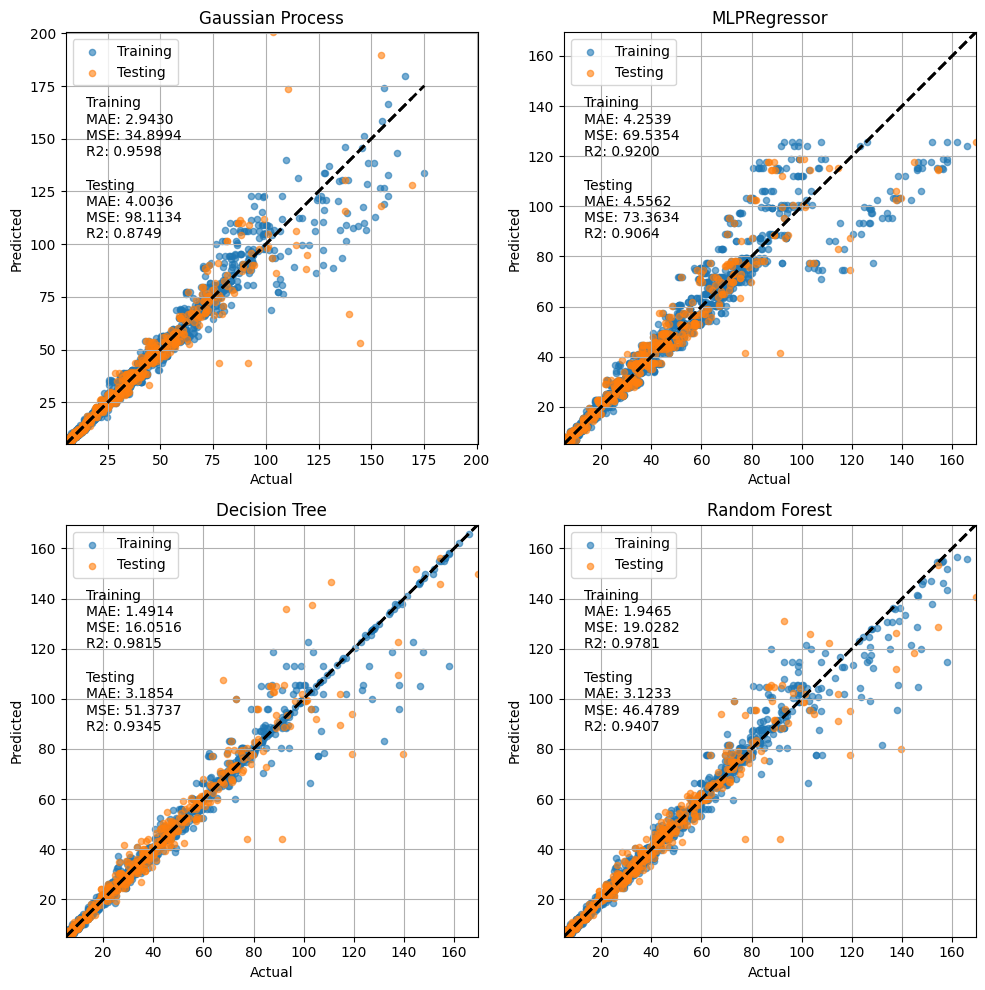

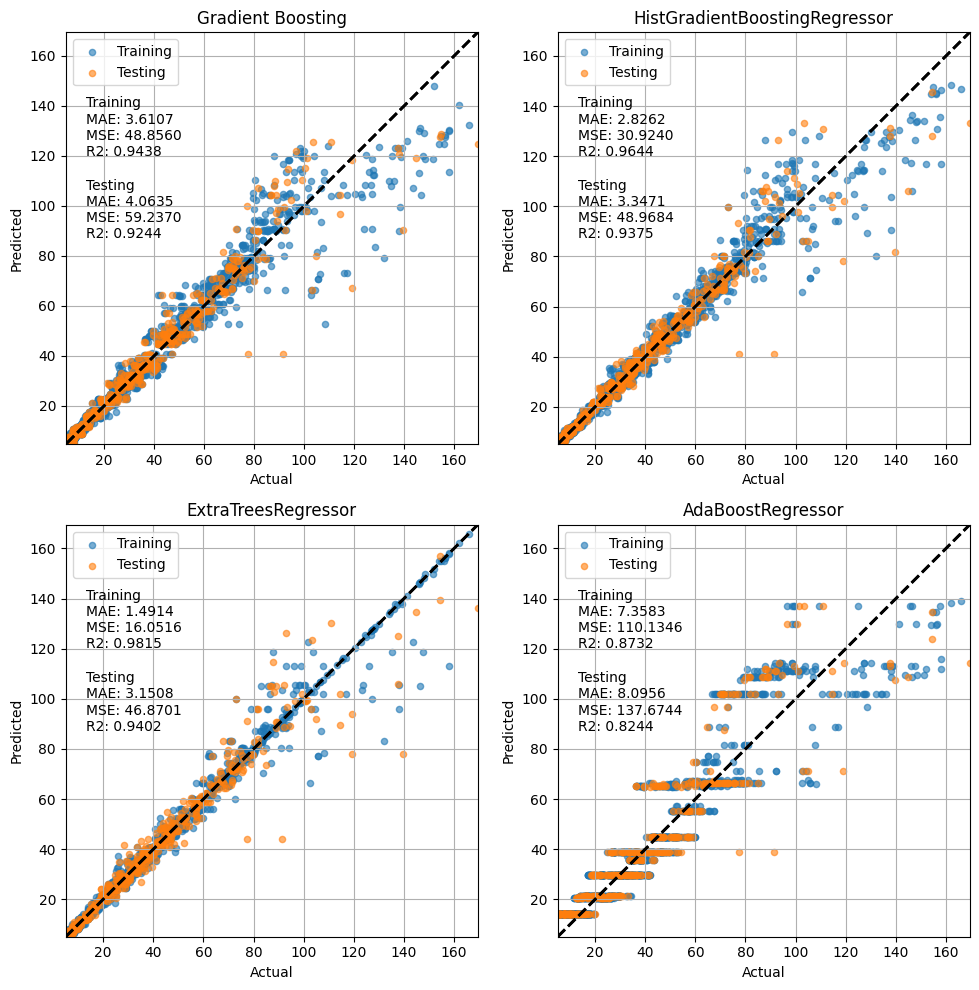

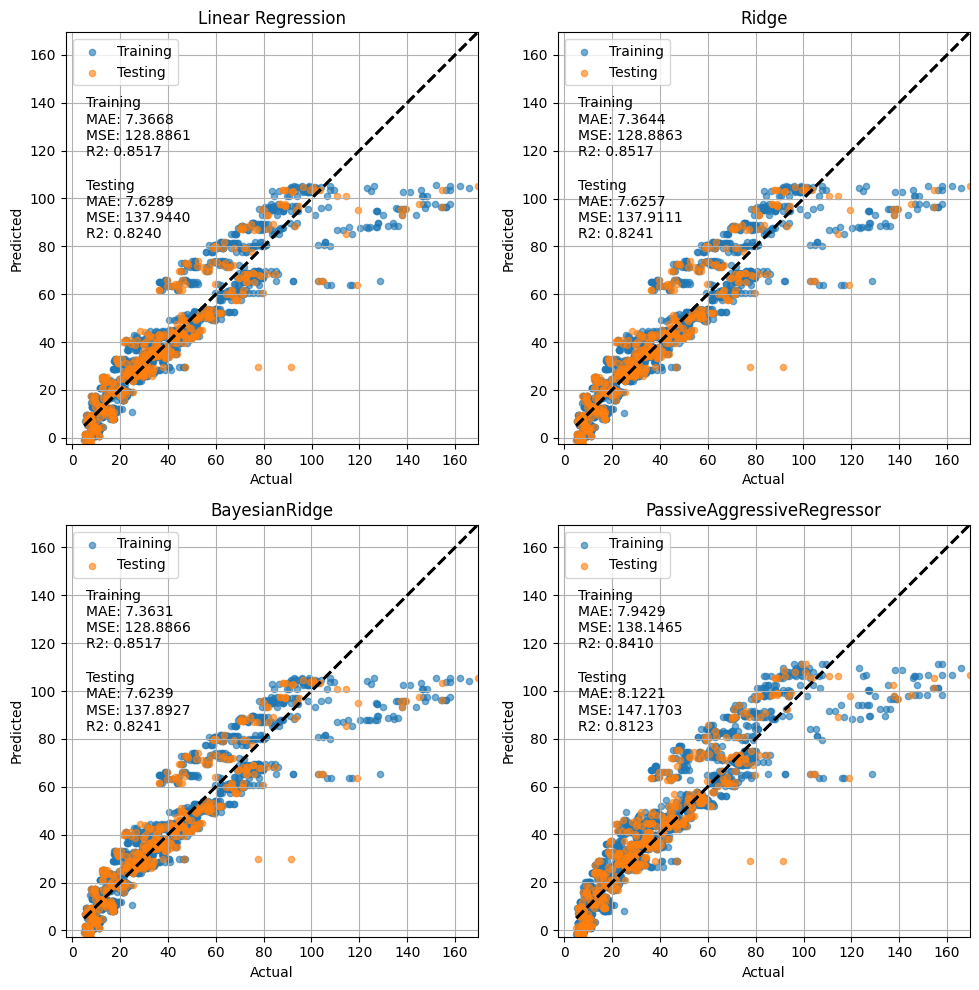

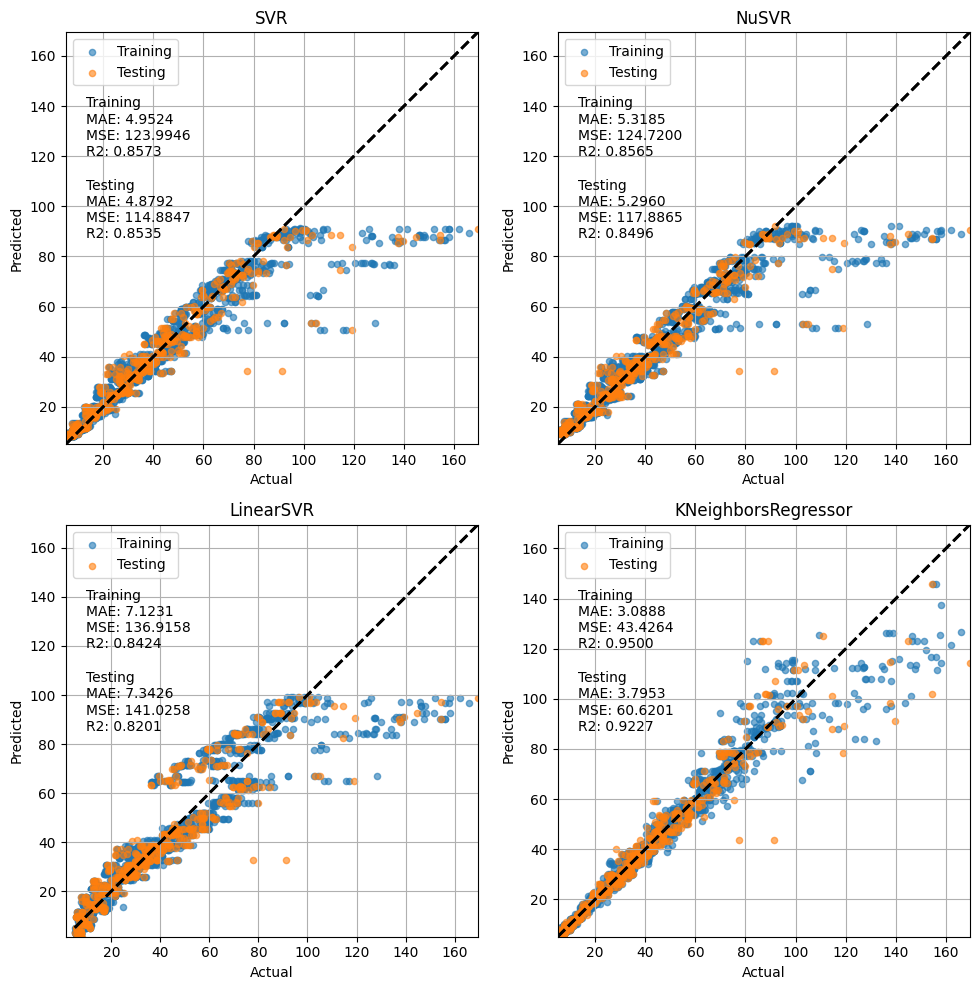

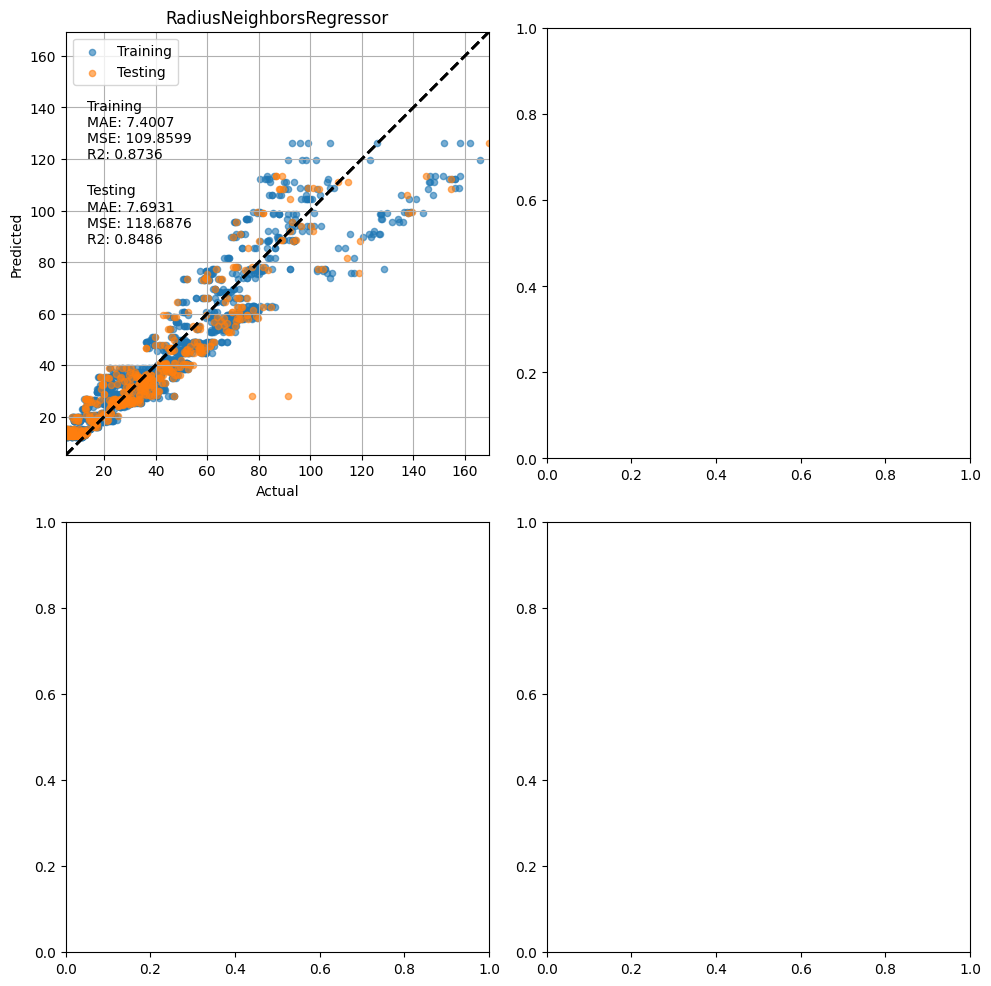

In [15]:
#PRELIMINARY ML MODELS ANALYSIS

plt.close('all')

#Run comparison of models
# Import models with default values
models = {
    
    # gaussian
    'Gaussian Process': GaussianProcessRegressor(),
    
    # neural network
    'MLPRegressor' : MLPRegressor(hidden_layer_sizes=(200,), max_iter=1000),

    # tree models
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'HistGradientBoostingRegressor' : HistGradientBoostingRegressor(),
    
    'ExtraTreesRegressor' : ExtraTreesRegressor(),
    'AdaBoostRegressor' :AdaBoostRegressor(),

    # the models below are no good!

    # linear models
    'Linear Regression': LinearRegression(),
    'Ridge' : Ridge(),
    'BayesianRidge' : BayesianRidge(),
    'PassiveAggressiveRegressor' : PassiveAggressiveRegressor(),

    # Support Vector Machines
    'SVR': SVR(),
    'NuSVR' : NuSVR(),
    'LinearSVR' : LinearSVR(),
        
    # neighbours
    'KNeighborsRegressor':KNeighborsRegressor(),
    'RadiusNeighborsRegressor' : RadiusNeighborsRegressor(),
    
}

train_metrics_df, test_metrics_df = CompileRunAndEvaluateModels(models, X_train, y_train, y_test)

# Display training metrics
print("")
print("------------------------")
print("Model Skill and Rankings")
print("------------------------")
print("")
print("Training Metrics:")
print("")
print(train_metrics_df)
# train_metrics_df.to_csv('metrics_train.csv')

# Display testing metrics
print("\nTesting Metrics:")
print("")
print(test_metrics_df)
print("")


Let's focus on decision trees (dt) as these were found to perform quite well, and we can also explore the explainability of the model

In [16]:
n_splits = 5 # number of random splits in the data

#define kfold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

#pick model
model = DecisionTreeRegressor(random_state=42)

train_mse = []
test_mse = []
train_maes = []
test_maes = []
train_r2s = []
test_r2s = []
train_rmse = []
test_rmse = []
train_explained_variance = []
test_explained_variance = []


#perform cross val
for train_index, test_index in kf.split(X_transformed):
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #fit model
    model.fit(X_train, y_train)
    #predict on test set
    y_pred = model.predict(X_test)
    #compare prediction to test values
    test_mse_score = mean_squared_error(y_test, y_pred)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    test_rmse_score = np.sqrt(test_mse_score)
    test_explained_variance_score = explained_variance_score(y_test, y_pred)
    
    #update test scores
    test_mse.append(test_mse_score)
    test_maes.append(test_mae)
    test_r2s.append(test_r2)
    test_rmse.append(test_rmse_score)
    test_explained_variance.append(test_explained_variance_score)

    #check accuracy of model fit
    train_mse_score = mean_squared_error(y_train, model.predict(X_train))
    train_mae = mean_absolute_error(y_train, model.predict(X_train))
    train_r2 = r2_score(y_train, model.predict(X_train))
    train_rmse_score = np.sqrt(train_mse_score)
    train_explained_variance_score = explained_variance_score(y_train, model.predict(X_train))

    #update train scores
    train_mse.append(train_mse_score)
    train_maes.append(train_mae)
    train_r2s.append(train_r2)
    train_rmse.append(train_rmse_score)
    train_explained_variance.append(train_explained_variance_score)

#print results (average across all folds)
print(f"Average test MSE: {np.mean(test_mse)}")
print(f"Test MSE: {test_mse}")
print(f"Average train MSE: {np.mean(train_mse)}")
print(f"Average test MAE: {np.mean(test_maes)}")
print(f"Average train MAE: {np.mean(train_maes)}")
print(f"Average test R²: {np.mean(test_r2s)}")
print(f"Average train R²: {np.mean(train_r2s)}")
print(f"Average test RMSE: {np.mean(test_rmse)}")
print(f"Average train RMSE: {np.mean(train_rmse)}")
print(f"Average test explained variance: {np.mean(test_explained_variance)}")
print(f"Average train explained variance: {np.mean(train_explained_variance)}")

cv_scores = cross_val_score(model, X_transformed, y, cv=kf, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE: {-cv_scores.mean()}")
print(f"Cross-validation MSE scores per fold: {-cv_scores}")

Average test MSE: 57.02416306638183
Test MSE: [51.517274008278335, 54.635688765569746, 54.092847491094666, 61.88092937285453, 62.99407569411189]
Average train MSE: 15.532182092241758
Average test MAE: 3.2214041611390245
Average train MAE: 1.4870166150307091
Average test R²: 0.9322904304787356
Average train R²: 0.9817796825594762
Average test RMSE: 7.545451453259727
Average train RMSE: 3.9378628684494723
Average test explained variance: 0.932320469994863
Average train explained variance: 0.9817796825594762
Cross-validation MSE: 57.02416306638183
Cross-validation MSE scores per fold: [51.51727401 54.63568877 54.09284749 61.88092937 62.99407569]


In [149]:
importance = model.feature_importances_
feature_names = ['reactor 1', 'reac 2', 'reac 3', 'reac 4', 'reac 5', 'reac 6', 'reac 7', 'reac 8', 'rpm', 'gasflow', 'water0/media1', 'sparger0/micro1']
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

            Feature  Importance
9           gasflow    0.670129
8               rpm    0.268967
10    water0/media1    0.026865
11  sparger0/micro1    0.007682
3            reac 4    0.005682
1            reac 2    0.005082
6            reac 7    0.004158
5            reac 6    0.003521
4            reac 5    0.002707
2            reac 3    0.001846
0         reactor 1    0.001825
7            reac 8    0.001536


Let's try the same analysis while leaving out


MAKE SURE TO RUN THE PACKAGES AND EXTRACT FROM .DAT file for df4: normal sparger, and water

In [4]:
print(df4)

     Reactor#   rpm  gasflow      kLa  water0/media1  sparger0/micro1
1           1  1000       50  27.4287              0                0
2           1  1000    50.02  23.1612              0                0
3           1  1000   50.039  26.7085              0                0
4           1  1000    50.02  23.0465              0                0
5           1  1000       50  26.3804              0                0
...       ...   ...      ...      ...            ...              ...
2407        8   500  499.844  42.3296              0                0
2408        8   500      500  39.2104              0                0
2409        8   500      500  41.7665              0                0
2410        8   500      500  39.7003              0                0
2411        8   500  499.844  41.4094              0                0

[2363 rows x 6 columns]


We want to isolate just the reactor, rpm and gas flow, with target value kLa to see if we can better understand the reactors influence on the empirical data

In [6]:
print(type(df4))

<class 'pandas.core.frame.DataFrame'>


In [10]:
X = df4.iloc[:, 0:3].values

y = df4.iloc[:, 3].values.reshape(-1,1)

print(X,y)

# Ensure the shapes are as expected below are expectations for this workflow/dataset
print(f"Shape of X: {X.shape}")  # Should be (2363, 3)
print(f"Shape of y: {y.shape}")  # Should be (2363, 1)

X = X.astype(float)
y = y.astype(float)
print(X.dtype)
print(y.dtype)

[['1' '1000' '50']
 ['1' '1000' '50.02']
 ['1' '1000' '50.039']
 ...
 ['8' '500' '500']
 ['8' '500' '500']
 ['8' '500' '499.844']] [['27.4287']
 ['23.1612']
 ['26.7085']
 ...
 ['41.7665']
 ['39.7003']
 ['41.4094']]
Shape of X: (2363, 3)
Shape of y: (2363, 1)
float64
float64


In [11]:
reactor_column_index = 0

# Extract reactor column and reashape for ohe
reactor_data = X[:, reactor_column_index].reshape(-1,1)

# Perform OHE
encoder = OneHotEncoder(sparse_output=False)

reactor_encoded = encoder.fit_transform(reactor_data)

continuous_column_indices = [1,2]

continuous_data = X[:, continuous_column_indices]

scaler = StandardScaler()
continuous_scaled = scaler.fit_transform(continuous_data)

# Combine reactor_encoded, continuous_scaled, and binary_data
X_transformed = np.concatenate([reactor_encoded, continuous_scaled], axis=1)

# Check the shape to ensure everything is combined correctly
print(f"Shape of X_transformed: {X_transformed.shape}")
print(X_transformed.dtype)

Shape of X_transformed: (2363, 10)
float64


In [17]:
print(X_transformed)

[[ 1.          0.          0.         ...  0.          1.48277573
  -0.91247042]
 [ 1.          0.          0.         ...  0.          1.48277573
  -0.91234842]
 [ 1.          0.          0.         ...  0.          1.48277573
  -0.91223252]
 ...
 [ 0.          0.          0.         ...  1.         -1.47152364
   1.83256247]
 [ 0.          0.          0.         ...  1.         -1.47152364
   1.83256247]
 [ 0.          0.          0.         ...  1.         -1.47152364
   1.83161086]]


At this point, now that we've recreated the variables X_transformed and y, we can just run the relevant code blocks to do the analysis on this particular dataset.  (Go back and run the FUNCTIONS CODEBLOCK, the preliminary ML models analysis and the dt analysis)

The dt analysis on feature importance is modified below as the feature space is different if we only consider 1 of the 4 datasets (we use only water and normal sparger so the binary columns are no longer applicable)

Same to code above but slight modifications have been made (I.e., removing )

In [18]:
importance = model.feature_importances_
feature_names = ['reactor 1', 'reac 2', 'reac 3', 'reac 4', 'reac 5', 'reac 6', 'reac 7', 'reac 8', 'rpm', 'gasflow']
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

     Feature  Importance
9    gasflow    0.706243
8        rpm    0.253564
6     reac 7    0.009645
2     reac 3    0.009524
5     reac 6    0.008663
1     reac 2    0.005299
3     reac 4    0.002677
4     reac 5    0.002511
7     reac 8    0.001244
0  reactor 1    0.000629
